In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
Metadf = pd.read_csv("Spanish MetaData.txt", delimiter="\t")


In [3]:
Metadf = Metadf.T

In [4]:
new_header = Metadf.iloc[0] #grab the first row for the header
Metadf = Metadf[1:] #take the data less the header row
Metadf.columns = new_header #set the header row as the df header

In [5]:

Metadf["Age"] = Metadf["Age"].replace({' NA':np.nan})
Metadf["Age"] = Metadf["Age"].astype(float)
Metadf["Gender"] = Metadf["Gender"].astype(int)
Metadf["Allergy"] = Metadf["Allergy"].astype(int)
Metadf["Asthma"] = Metadf["Asthma"].astype(int)
Metadf["Dermatitis"] = Metadf["Dermatitis"].astype(int)
Metadf["rhinitis"] = Metadf["rhinitis"].astype(int)
# convert Age in years to Age in months

#Metadf["Age"] *= 12

Metadf.to_csv("cleaned_SpanishData.csv",index = False)

Metadf

!Sample_title,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
Inma1,GSM4210053,0,48.390000,0,0,0,0
Inma10,GSM4210054,0,50.430000,0,0,0,0
Inma100,GSM4210055,1,53.880904,0,0,0,0
Inma101,GSM4210056,0,52.665298,1,1,0,0
Inma102,GSM4210057,1,53.650924,0,0,0,0
...,...,...,...,...,...,...,...
Inma95,GSM4210249,1,55.162218,1,0,1,0
Inma96,GSM4210250,0,47.460000,0,0,0,0
Inma97,GSM4210251,0,47.610000,1,1,1,0
Inma98,GSM4210252,1,48.030000,0,0,0,0


In [6]:
AllergyCount = Metadf["Allergy"].sum()
AsthmaCount = Metadf["Asthma"].sum()
DermatitisCount = Metadf["Dermatitis"].sum()
rhinitisCount = Metadf["rhinitis"].sum()

controlCount = len(Metadf[(Metadf["Allergy"] == 0) & (Metadf["Asthma"] == 0) & 
                          (Metadf["Dermatitis"] == 0) & (Metadf["rhinitis"] == 0)])

allergyToAsthmaCount = len(Metadf[(Metadf["Allergy"] == 0) & (Metadf["Asthma"] == 1)]) 
#Either allergy or control, allergy or Asthma
                        


AllergyCount, AsthmaCount, DermatitisCount, rhinitisCount, controlCount, allergyToAsthmaCount

(92, 36, 67, 10, 109, 0)

<AxesSubplot:xlabel='Gender', ylabel='count'>

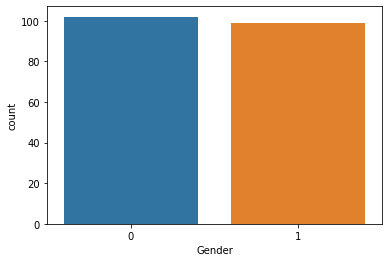

In [7]:
sns.countplot(x = "Gender", data=Metadf)

<AxesSubplot:xlabel='Features', ylabel='count'>

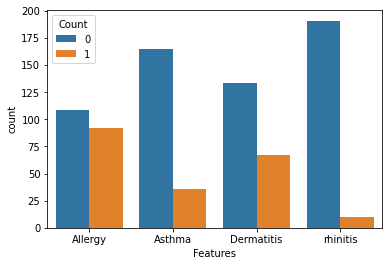

In [8]:
features = ['Allergy', 'Asthma', 'Dermatitis', 'rhinitis']

melted_df = Metadf.melt(id_vars=['!Sample_geo_accession'], value_vars=features, var_name='Features', value_name='Count')

sns.countplot(data=melted_df, x='Features', hue='Count')


<AxesSubplot:xlabel='Allergy', ylabel='count'>

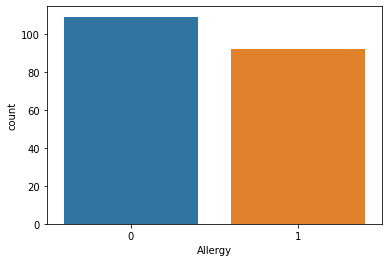

In [9]:
sns.countplot(x = "Allergy", data=Metadf)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

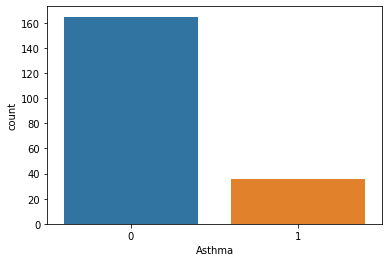

In [10]:
sns.countplot(x = "Asthma", data=Metadf)

<AxesSubplot:xlabel='Dermatitis', ylabel='count'>

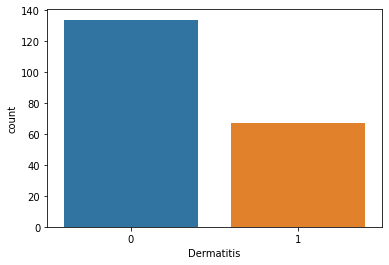

In [81]:
sns.countplot(x = "Dermatitis", data=Metadf)

<AxesSubplot:xlabel='rhinitis', ylabel='count'>

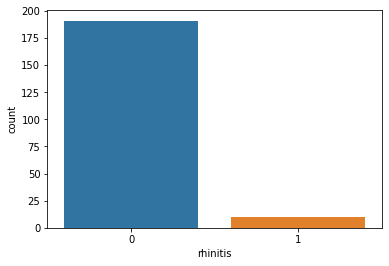

In [82]:
sns.countplot(x = "rhinitis", data=Metadf)

AttributeError: module 'matplotlib' has no attribute 'show'

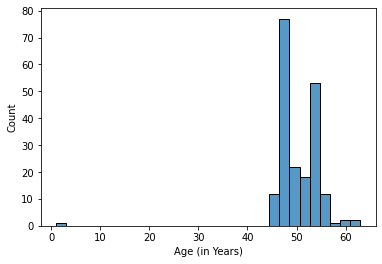

In [13]:
ax = sns.histplot(x = "Age", data=Metadf, bins=30) #in years 
ax.set(xlabel='Age (in Years)')
plt.show()

AttributeError: 'Rectangle' object has no property 'xlabel'

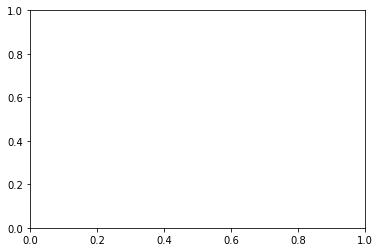

In [11]:
sns.histplot(x = "Age", data=Metadf, hue = "Allergy", bins = 30,xlabel="Age (in years)")

<AxesSubplot:xlabel='Age', ylabel='Count'>

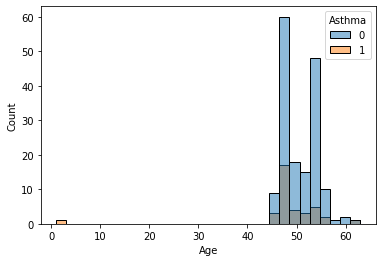

In [85]:
sns.histplot(x = "Age", data=Metadf, hue = "Asthma", bins = 30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

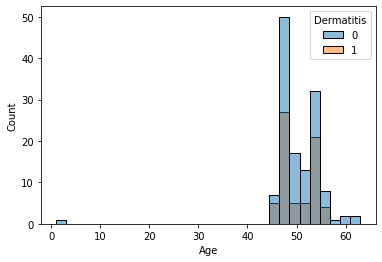

In [86]:
sns.histplot(x = "Age", data=Metadf, hue = "Dermatitis", bins = 30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

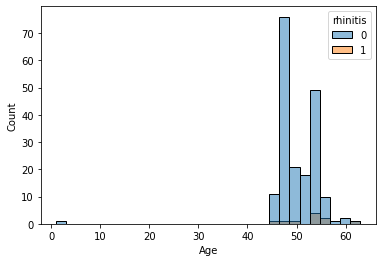

In [87]:
sns.histplot(x = "Age", data=Metadf, hue = "rhinitis", bins = 30)